In [48]:
import numpy as np
import pandas as pd
import numpy.random as rng
import json
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [49]:
file = 'eval_results/null.npz'
d = np.load(file, allow_pickle=True)
null_ae = d['split_ae']
null_mae_by_output = np.mean(null_ae, axis=1)

In [52]:
files = ['eval_results/linear_main_effects.npz',
         'eval_results/quadratic_main_effects.npz',
         'eval_results/linear_all_effects.npz',
         'eval_results/quadratic_all_effects.npz',
         'eval_results/ann.npz']

rows = []
for file in files:
    d = np.load(file, allow_pickle=True)
    cfg = d['cfg'].tolist()
    output_cols = cfg['output_cols']
    labels = [l.replace('process_','') for l in output_cols]

    ae = d['split_ae']
    
    mae_by_output = np.mean(ae, axis=1)
    
    rel_mae_by_output = (null_mae_by_output - mae_by_output) / null_mae_by_output
    n_repeats, n_outputs = rel_ae_by_output.shape
    
    for r in range(n_repeats):
        for o in range(n_outputs):
            rows.append({
                "model" : cfg['model']['name'],
                "repeat" : r,
                "output" : labels[o],
                "rel_output_mae" : rel_mae_by_output[r, o],
                "output_mae" : mae_by_output[r, o],
            })

results = pd.DataFrame(rows)
results

,model,repeat,output,rel_output_mae,output_mae
0,Linear (Main Effects),0,Hydrogen,0.470222,0.000013
1,Linear (Main Effects),0,Methane,0.401819,0.000058
2,Linear (Main Effects),0,Ethane,0.665735,0.000457
3,Linear (Main Effects),0,Propane,0.882964,0.000852
4,Linear (Main Effects),0,i-Butane,0.866420,0.001248
...,...,...,...,...,...
945,ANN,9,Mcyclopentan,0.951458,0.000080
946,ANN,9,Benzene,0.298526,0.000005
947,ANN,9,Cyclohexane,0.959495,0.000071
948,ANN,9,2-Mhexane,0.982312,0.000071


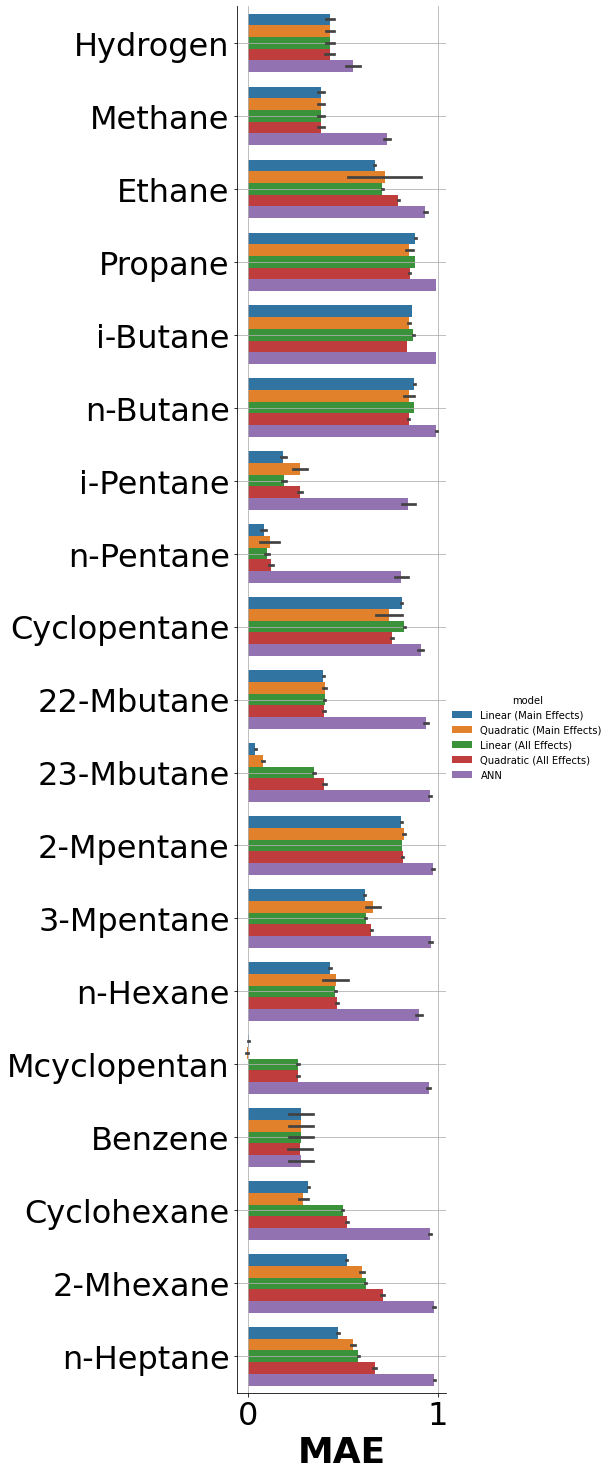

In [53]:
g = sns.catplot(x="rel_output_mae", y="output", hue="model", 
                data=results, kind='bar', orient='h', ci='sd', aspect=0.25, height=20, 
                legend=True)
ax = g.ax
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
ax.set_ylabel('')
ax.set_xlabel('MAE', fontsize=36, fontweight='bold')
ax.grid(True)